Github --> https://github.com/Somto-Dera/ECGR5090-Machine-Learning.git

# Homework 2
In this homework, we will use the Diabetes dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.)

 

## Problem 1
Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your results, including accuracy, precision, and recall. Also, plot the confusion matrix representing your binary classifier. 

STEPS
<br>
-- Import Library<br>
-- Load dataset<br>
-- Process data<br>
-- Create model<br>
-- Evaluate Model<br>


<br> 

### Import Library

In [1]:
# pandas is used for data manipulation and analysis
import pandas as pd     

# numpy is used for array and matrics manipulation
import numpy as np

# matplotlib is used for data visualisation
import matplotlib.pyplot as plt

# seaborn is used for data visualization (heat map)
import seaborn as sns

# sklearn-metrics is used for measuring classification peformance
from sklearn import metrics

from sklearn import model_selection

# sklearn-logreg is used for creating logreg model
from sklearn.linear_model import LogisticRegression

# sklearn-traintestsplit is used for spliting dataset
from sklearn.model_selection import train_test_split, KFold

# sklearn-scaler is used for scaling dataset
from sklearn.preprocessing import StandardScaler

# sklearn-naive_bayes is used for creating GNB model
from sklearn.naive_bayes import GaussianNB

#%matplotlib inline

<br> 


### Import and Display the first 5 rows of the dataset

In [2]:
# load dataset into diabetes variable
diabetes = pd.read_csv('diabetes.csv')

# To get first five rows from the dataset default value
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<br> 


### Data Preprocessing and Analysis
Make a new dataframe which is a copy of the dataset so that our original dataset remains unchanged

In [3]:
# load dataset into a new variable(df) 
df = diabetes

# display first five rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<br> 

**Find the size of the dataframe**

In [4]:
# prints shape of dataset so we can know it's dimensions
df.shape

(768, 9)

<br>

**Check if our data contains any missing  values**

In [5]:
# Check for number of empty(NaN) cells in dataset
df.isnull().sum().sort_values(ascending=False)[:10]

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<br> 

**Checking the data datatypes of each columns in the dataset**

In [6]:
# ".dtypes" returns a Series with the data type of each column
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# Shows descriptive statistics on the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<br> 

**Split datasets into feature and target datasets**

In [8]:
# Split dataset in features and target sets
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Features, '[]' is used because X is a matrix
X = df[feature_cols]

# Target variable, '.Outcome' is used because y is a vector
y = df.Outcome

# Print out first five rows of the X set
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


<br>

**Split X and y datasets into train and test datasets**<br>
Split datasets into 80-20 ratio.

In [9]:
# split X and y into training, testing sets and print out it's shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (614, 8)
X_test dimension=  (154, 8)
y_train dimension=  (614,)
y_test dimension=  (154,)


<br> 

**Scale and standardize features**

In [10]:
# create an instance of StandardScaler
sc = StandardScaler() 

# Scale the test and train data set. 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# print out scaled datasets
print("Scaled training features:\n", X_train)
print("\nScaled testing features:\n", X_test)

Scaled training features:
 [[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]]

Scaled testing features:
 [[ 0.68185612 -0.71402038 -0.61712658 ...  0.26073561 -0.11637247
   0.87809089]
 [-0.52639686 -0.27664283  0.30191569 ...  0.48053518 -0.954231
  -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 ... -0.15300476 -0.9245197
  -1.03594038]
 ...
 [ 1.28598261 -0.80774414  0.13973176 ...  0.62275843  0.04703966
   2.0961108 ]
 [-0.52639686  0.78555979  0.03160914 ... -0.51502758 -0.39268751
  -0.33992901]
 [ 1.28598261 -1.46381046  0.03160914 ...  0.4288

**Side Note:** 
From cell(In[4]) we can observe that there are a total of 768 rows and 9 columns. The feature variables are 'Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age' and the target variables are 'Outcome'. We also observed that there are no empty cells(In[5]) in the dataset. The dataset has been scaled and splitted accordingly.

<br>



### Binary Logistic Regression Model

In [11]:
# Create an instance of Logistic Regression Classifier, fit the data and test the model.
lm = LogisticRegression().fit(X_train,y_train)

y_pred=lm.predict(X_test)

print("Training set score: {:.5f}".format(lm.score(X_train, y_train)))
print("Test set score: {:.5f}".format(lm.score(X_test, y_test)))
print("Predictions: ", (y_pred))

Training set score: 0.77036
Test set score: 0.75325
Predictions:  [0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


**Side Note:** 
From the output of cell([]) you see that Training score is more than the Test score. This is misleading. Which is why we use seperate datasets for testing when creating models, if not it won't generalise well and may give inaccurate predictions.


<br>



### Model Evaluation

**Confusion Matrix**

Text(0.5, 257.44, 'Predicted label')

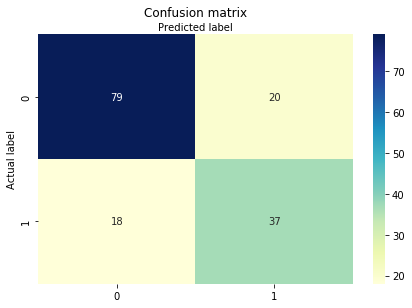

In [12]:
# Create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Side Note:**
<br> True Positives (TP): we correctly predicted that they do have diabetes.
* 37

<br> True Negatives (TN): we correctly predicted that they don't have diabetes.
* 79

<br> False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
* 20
* Falsely predict positive
* Type I error

<br> False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")
* 18
* Falsely predict negative
* Type II error

<br>
0: negative class
1: positive class

<br>

**Performance Metrics of Model**

-- *Accuracy* is the percentage of correct predictions ((TP + TN)/(TP+FP+TN+FN)).
<br>-- *Precision* is the accuracy of positive predictions (TP/(TP + FP)).
<br>-- *Recall* is the fraction of positives that were correctly identified (TP/(TP+FN)).
<br>-- *F1-score* is the percent of positive predictions were correct (2*(Recall * Precision) / (Recall + Precision)).
<br>-- Support* is the number of occurances of a given class.
<br>-- *Null Accuracy* is reading gotten by predicting the most frequent class.

In [13]:
# print classification report
print(metrics.classification_report(y_test, y_pred))

# prints accuracy of the model
print("\n\nAccuracy:",metrics.accuracy_score(y_test, y_pred))

# prints classification error of the model
print("Classification Error:",1 - metrics.accuracy_score(y_test, y_pred))

# prints precision of the model
print("Precision:",metrics.precision_score(y_test, y_pred))

# prints recall of the model
print("Recall/Sensitivity:",metrics.recall_score(y_test, y_pred))

# prints specitivity of the model
print("Specificity:",(cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[0, 1])))


# Calculate Null Accuracy to test our model
# calculate the percentage of ones
#percentage_ones = y_test.mean()

# calculate the percentage of zeros
#percentage_zero = 1 - y_test.mean()

# calculate null accuracy
#print("Null accuracy:", max(percentage_ones, percentage_zero))

# examine the class distribution of the testing set (using a Pandas Series method)
print("Class Distribution:\n")
print(y_test.value_counts())

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Accuracy: 0.7532467532467533
Classification Error: 0.24675324675324672
Precision: 0.6491228070175439
Recall/Sensitivity: 0.6727272727272727
Specificity: 0.797979797979798
Class Distribution:

0    99
1    55
Name: Outcome, dtype: int64


**Side Note:** We have a null accuracy of 0.64  compared to the accuracy of our model which is 0.75, which means our model is decent(our model isn't dumb).

<br>

**ROC Curve**

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. Ideally the curve should be close to the top left corner, we'll want a high recall with and low fpr. AUC is useful when there is high class imbalance.

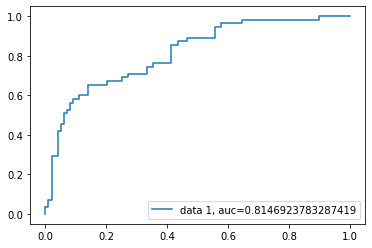

In [14]:
y_pred_prob = lm.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc), )
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.81. AUC score 1 represents perfect classifier.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Problem 2
Using the diabetes dataset, build a Naïve Bayes binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your results, including accuracy, precision, and recall. Also, plot the confusion matrix representing your binary classifier. Compare and analyze your results against problem 1.

### Gaussian Naive-Bayes Model

In [15]:
# Create an instance of Gaussian NB Classifier, fit the data and test the model.
gnb_model = GaussianNB()

gnb_model.fit(X_train, y_train)

y_pred = gnb_model.predict(X_test)
print("Predictions: ", (y_pred))

Predictions:  [0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0]


<br>

**Performance Metrics of Model**

-- *Accuracy* is the percentage of correct predictions ((TP + TN)/(TP+FP+TN+FN)).
<br>-- *Precision* is the accuracy of positive predictions (TP/(TP + FP)).
<br>-- *Recall* is the fraction of positives that were correctly identified (TP/(TP+FN)).
<br>-- *F1-score* is the percent of positive predictions were correct (2*(Recall * Precision) / (Recall + Precision)).
<br>-- Support* is the number of occurances of a given class.
<br>-- *Null Accuracy* is reading gotten by predicting the most frequent class.

In [16]:
# print classification report
print(metrics.classification_report(y_test, y_pred))

# prints accuracy of the model
print("\n\nAccuracy:",metrics.accuracy_score(y_test, y_pred))

# prints classification error of the model
print("Classif Error:",1 - metrics.accuracy_score(y_test, y_pred))

# prints precision of the model
print("Precision:",metrics.precision_score(y_test, y_pred))

# prints recall of the model
print("Recall/Sensitivity:",metrics.recall_score(y_test, y_pred))

# prints specitivity of the model
print("Specificity:",(cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[0, 1])))


# Calculate Null Accuracy to test our model
# calculate the percentage of ones
#percentage_ones = y_test.mean()

# calculate the percentage of zeros
#percentage_zero = 1 - y_test.mean()

# calculate null accuracy
#print("Null accuracy:", max(percentage_ones, percentage_zero))

# examine the class distribution of the testing set (using a Pandas Series method)
print("Class Distribution:\n")
print(y_test.value_counts())

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Accuracy: 0.7662337662337663
Classif Error: 0.23376623376623373
Precision: 0.6610169491525424
Recall/Sensitivity: 0.7090909090909091
Specificity: 0.797979797979798
Class Distribution:

0    99
1    55
Name: Outcome, dtype: int64


<br>

**Confusion Matrix**

Text(0.5, 257.44, 'Predicted label')

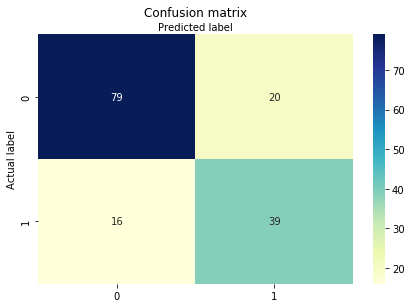

In [17]:
# Create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Side Note:**
<br> True Positives (TP): we correctly predicted that they do have diabetes.
* 39

<br> True Negatives (TN): we correctly predicted that they don't have diabetes.
* 79

<br> False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
* 20
* Falsely predict positive
* Type I error

<br> False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")
* 16
* Falsely predict negative
* Type II error

<br>
0: negative class
1: positive class

**ROC Curve**

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. Ideally the curve should be close to the top left corner, we'll want a high recall with and low fpr. AUC is useful when there is high class imbalance.

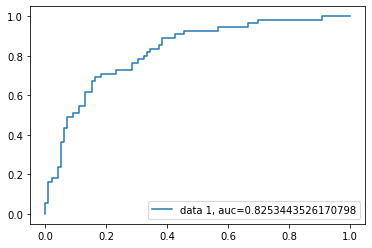

In [18]:
y_pred_prob = gnb_model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc), )
plt.legend(loc=4)
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Problem 3
Repeat problem 1, and this time use K-fold cross-validation for your training and validation. Perform the training two times for K=5 and K=10. Analyze and compare your results against problem 1.

<br>

**Perform k=10 kfold (Logistic Regression):** I am not here.

In [19]:
# Applying 10-Fold Cross Validation
kfold = KFold(n_splits=10, random_state=100, shuffle= True)

# create instance of log regression object
lr_kfold = LogisticRegression(solver='lbfgs', max_iter=1000)

# create kfold Logistic Regression model
#results_kfold = model_selection.cross_val_score(lr_kfold, X = X_train, y= y_train, cv=kfold, scoring="accuracy")
results_kfold = model_selection.cross_val_score(lr_kfold, X = X, y= y, cv=kfold )

# convert scores to percent
lst_results_kfold = [val * 100.0 for val in results_kfold]
lst_results_kfold = ['%.5f' % val for val in lst_results_kfold]

# print out model metrics
print("Average Accuracy: %.5f%%" % (results_kfold.mean()*100.0)) 
print("Standard Deviation: %.5f%%" % (results_kfold.std()*100.0))
print("Accuracy of Each Fold(Splits = 10): ",(lst_results_kfold))

Average Accuracy: 77.33766%
Standard Deviation: 4.50468%
Accuracy of Each Fold(Splits = 10):  ['77.92208', '68.83117', '77.92208', '76.62338', '77.92208', '75.32468', '84.41558', '84.41558', '72.36842', '77.63158']


<br>

**Perform k=5 kfold (Logistic Regression):** I am not here.

In [20]:
# Applying 5-Fold Cross Validation
kfold = KFold(n_splits=5, random_state=100, shuffle= True)

# create instance of log regression object
lr_kfold = LogisticRegression(solver='lbfgs', max_iter=1000)

# create kfold Logistic Regression model
# results_kfold = model_selection.cross_val_score(lr_kfold, X = X_train, y= y_train, cv=kfold, scoring="accuracy")
results_kfold = model_selection.cross_val_score(lr_kfold, X = X, y= y, cv=kfold, scoring="accuracy")

# convert scores to percent
lst_results_kfold = [val * 100.0 for val in results_kfold]
lst_results_kfold = ['%.5f' % val for val in lst_results_kfold]

# print out model metrics
print("Accuracy: %.5f%%" % (results_kfold.mean()*100.0)) 
print("Standard Deviation: %.5f%%" % (results_kfold.std()*100.0))
print("Accuracy of Each Fold(Splits = 5): ",(lst_results_kfold))

Accuracy: 77.86945%
Standard Deviation: 3.56733%
Accuracy of Each Fold(Splits = 5):  ['74.02597', '77.92208', '77.92208', '84.31373', '75.16340']


<br>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Problem 4
Repeat problem 2, and this time use K-fold cross-validation for your training and validation. Does this make sense? Elaborate on your answer.

**Perform k=10 kfold (Gassian Naive-Bayes)**

In [21]:
# Applying 10-Fold Cross Validation
kfold = KFold(n_splits=10, random_state=100, shuffle= True)

# instantiate a GassianNB object
gnb_modell = GaussianNB()

# create kfold gnb model
gnb_results_kfold = model_selection.cross_val_score(gnb_modell, X = X, y = y, cv = kfold)

# compute and display scores from kfold gnb model
print('Cross-validation scores:{}'.format(gnb_results_kfold))

# compute Average cross-validation score and display
print('\nAverage cross-validation score: {:.4f}'.format(gnb_results_kfold.mean()))

Cross-validation scores:[0.7012987  0.66233766 0.77922078 0.75324675 0.75324675 0.75324675
 0.80519481 0.81818182 0.71052632 0.78947368]

Average cross-validation score: 0.7526


<br><br><br><br><br><br><br><br><br><br>
# Observation:

**Compare Results of Q1 and Q2:**
<br>
The results of evaluation metrics for question One (In[13]) and question 2 (In[16]) shows that the gaussian NB model has a higher accuracy than the logistic regression model. Other evaluation metrics for classification models include precision and recall. Accuracy can be deceiving depending on the context of the model. There in recall and precision is more dependable. From the evaluation metrics of both models (In[13] and In[16]). Ideally precision is something we want to maximise. Gassian NB model also has better recall and precision than the Logistic Regression model. We might say that both model's performance is good based on the accuracy. But, if we see from the sensitivity of both models (In[13] and In[16]), indicates that there are still many False Negatives (FN) from the prediction result, so we can say that the model still needs some improvements to increase the sensitivity score, therefore decrease the False Negative occurrences.

**Compare Results of Q1 and Q3:**
<br>
Performing a cross validation on the logistic regression as opposed to the regular train-test split log regression(In[13]) produced a model with higher accuracy(In[19]) than the latter. 

**Results Q4:**
<br>
Results from q4 (In[21]) shows that the model is less accuracte than the model derived in q2 (In[19]) meaning that the kfold doesn't improve the model.